In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

import os

In [4]:
pd.options.display.float_format = '{:20,.2f}'.format

In [5]:
steam_data = pd.read_csv('../data/steam_clean.csv', parse_dates=['release_date'], index_col=0)
steam_data2 = pd.read_csv('../data/steam_clean2.csv', parse_dates=['release_date'], index_col=0)

In [6]:
steam_data.shape, steam_data2.shape

((27075, 43), (26356, 43))

In [5]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        27075 non-null  int64         
 1   appid             27075 non-null  int64         
 2   name              27075 non-null  object        
 3   release_date      27075 non-null  datetime64[ns]
 4   yrs_released      27075 non-null  int64         
 5   winter            27075 non-null  int64         
 6   spring            27075 non-null  int64         
 7   summer            27075 non-null  int64         
 8   fall              27075 non-null  int64         
 9   achievements      27075 non-null  int64         
 10  average_playtime  27075 non-null  int64         
 11  median_playtime   27075 non-null  int64         
 12  price             27075 non-null  float64       
 13  avg_owners        27075 non-null  float64       
 14  revenue           2707

In [5]:
steam_data.head()

,appid,name,release_date,yrs_released,winter,spring,summer,fall,achievements,average_playtime,...,atmospheric,vr,difficult,story_rich,free_to_play,anime,horror,platformer,pixel_graphics,violent
0,10,Counter-Strike,2000-11-01,19,0,0,0,1,0,17612,...,0,0,0,0,0,0,0,0,0,1
1,20,Team Fortress Classic,1999-04-01,20,0,1,0,0,0,277,...,0,0,0,0,0,0,0,0,0,1
2,30,Day of Defeat,2003-05-01,16,0,1,0,0,0,187,...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,18,0,0,1,0,0,258,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,20,0,0,0,1,0,624,...,1,0,0,1,0,0,0,0,0,0


# 1. Explore target features

### a. Revenue

In [8]:
steam_data['revenue'].describe()

count              27,075.00
mean            1,139,977.73
std            14,695,719.81
min                     0.00
25%                19,900.00
50%                55,900.00
75%               149,900.00
max         2,024,250,000.00
Name: revenue, dtype: float64

Separate free games and paid games for this exploratory analysis

In [9]:
steam_data['free_to_play'].value_counts()
# Most games are not F2P

0    25234
1     1841
Name: free_to_play, dtype: int64

# (Using steam_data2 from this point on)
### (drops games with missing price values)

In [9]:
paid_games = steam_data2.loc[steam_data['free_to_play']==0, ['price', 'revenue']]
free_games = steam_data2.loc[steam_data['free_to_play']==1, ['price', 'revenue']]

In [10]:
free_games.describe()

,price,revenue
count,"1,841.00","1,841.00"
mean,0.00,0.00
std,0.00,0.00
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,0.00,0.00


Good. After some data cleaning, we don't see any paid games in the F2P tag

In [12]:
paid_games.describe()

,price,revenue
count,"25,234.00","25,234.00"
mean,6.52,"1,223,147.22"
std,7.98,"15,219,040.62"
min,0.00,0.00
25%,1.99,"27,650.00"
50%,4.79,"59,900.00"
75%,7.19,"154,900.00"
max,421.99,"2,024,250,000.00"


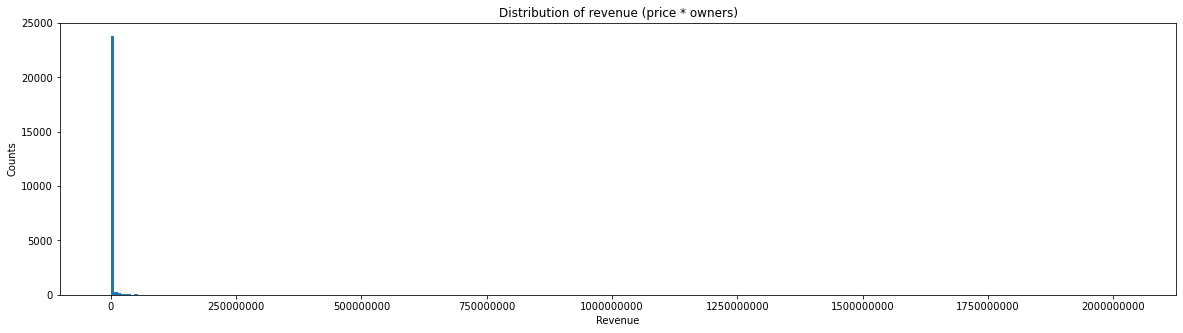

In [12]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(paid_games['revenue'], bins=300);
ax.set_title('Distribution of revenue (price * owners)');
ax.set_xlabel('Revenue');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(paid_games['revenue'], bins=300);
ax.set_title('Distribution of revenue (price * owners)');
ax.set_xlabel('Revenue');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

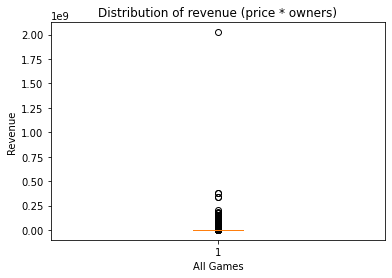

In [14]:
plt.boxplot(paid_games['revenue']);
plt.title('Distribution of revenue (price * owners)');
plt.xlabel('All Games');
plt.ylabel('Revenue');

Revenue seems to skew towards 0. Additionally, there seems to be one extreme outlier.

In [14]:
steam_data2[['appid', 'name', 'price','avg_owners','revenue']].sort_values('revenue',ascending=False).head(10)

,appid,name,price,avg_owners,revenue
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,26.99,"75,000,000.00","2,024,250,000.00"
12965,582010,MONSTER HUNTER: WORLD,49.99,"7,500,000.00","374,925,000.00"
2478,271590,Grand Theft Auto V,24.99,"15,000,000.00","374,850,000.00"
22458,863550,HITMAN™ 2,44.99,"7,500,000.00","337,425,000.00"
4712,346110,ARK: Survival Evolved,44.99,"7,500,000.00","337,425,000.00"
2016,252490,Rust,27.79,"7,500,000.00","208,425,000.00"
2964,292030,The Witcher® 3: Wild Hunt,24.99,"7,500,000.00","187,425,000.00"
2878,289070,Sid Meier’s Civilization® VI,49.99,"3,500,000.00","174,965,000.00"
20828,814380,Sekiro™: Shadows Die Twice,49.90,"3,500,000.00","174,650,000.00"
2087,255710,Cities: Skylines,22.99,"7,500,000.00","172,425,000.00"


It seems one game has a calculated revenue significantly higher than the other games

In [15]:
# Remove outlier to see how revenue distribution changes
no_outlier = steam_data2.drop(12836, axis=0)

In [16]:
no_outlier['revenue'].describe()

count              26,355.00
mean            1,094,314.06
std             8,155,939.05
min                     0.00
25%                20,900.00
50%                57,900.00
75%               149,900.00
max           374,925,000.00
Name: revenue, dtype: float64

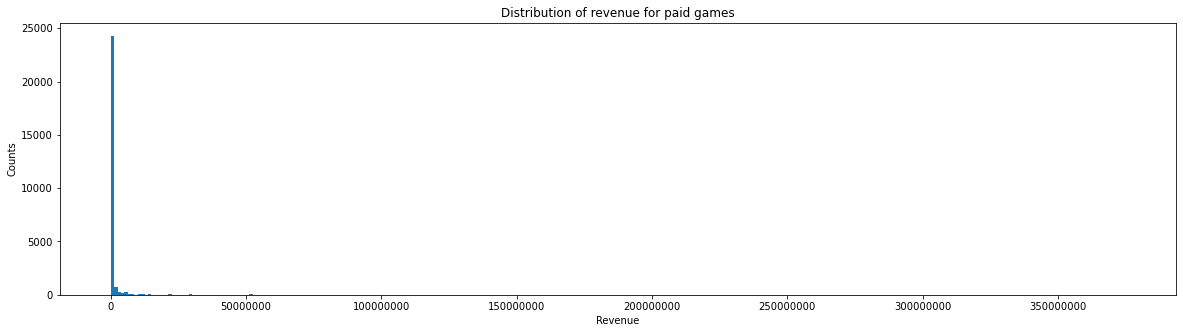

In [17]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(no_outlier['revenue'], bins=300);
ax.set_title('Distribution of revenue for paid games');
ax.set_xlabel('Revenue');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

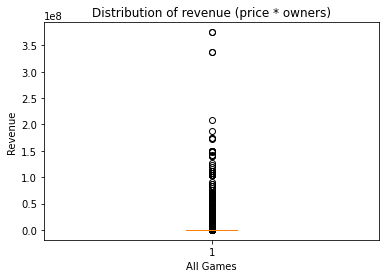

In [18]:
plt.boxplot(no_outlier['revenue']);
plt.title('Distribution of revenue (price * owners)');
plt.xlabel('All Games');
plt.ylabel('Revenue');

A little better, but still very skewed

### b. Percent Positive Ratings

In [19]:
steam_data2['perc_pos_ratings'].describe()

count              26,356.00
mean                    0.71
std                     0.23
min                     0.00
25%                     0.58
50%                     0.76
75%                     0.89
max                     1.00
Name: perc_pos_ratings, dtype: float64

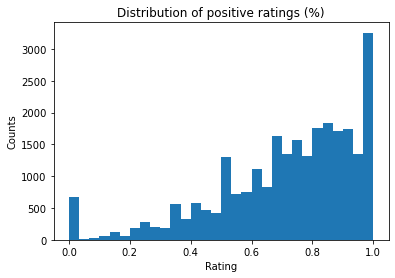

In [20]:
fig, ax = plt.subplots()

ax.hist(steam_data2['perc_pos_ratings'], bins=30);
ax.set_title('Distribution of positive ratings (%)');
ax.set_xlabel('Rating');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

Most games seem to lean towards the higher end of positive ratings, though there seems to be a small peak of very negatively received games.

In [22]:
steam_data2.head(26)

,appid,name,release_date,yrs_released,winter,spring,summer,fall,achievements,average_playtime,...,atmospheric,vr,difficult,story_rich,free_to_play,anime,horror,platformer,pixel_graphics,violent
0,10,Counter-Strike,2000-11-01,19,0,0,0,1,0,17612,...,0,0,0,0,0,0,0,0,0,1
1,20,Team Fortress Classic,1999-04-01,20,0,1,0,0,0,277,...,0,0,0,0,0,0,0,0,0,1
2,30,Day of Defeat,2003-05-01,16,0,1,0,0,0,187,...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,18,0,0,1,0,0,258,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,20,0,0,0,1,0,624,...,1,0,0,1,0,0,0,0,0,0
5,60,Ricochet,2000-11-01,19,0,0,0,1,0,175,...,0,0,0,0,0,0,0,1,0,0
6,70,Half-Life,1998-11-08,21,0,0,0,1,0,1300,...,1,0,1,1,0,0,0,0,0,0
7,80,Counter-Strike: Condition Zero,2004-03-01,15,0,1,0,0,0,427,...,1,0,0,0,0,0,1,0,0,0
8,130,Half-Life: Blue Shift,2001-06-01,18,0,0,1,0,0,361,...,1,0,0,1,0,0,0,0,0,0
9,220,Half-Life 2,2004-11-16,15,0,0,0,1,33,691,...,1,0,0,1,0,0,1,0,0,0


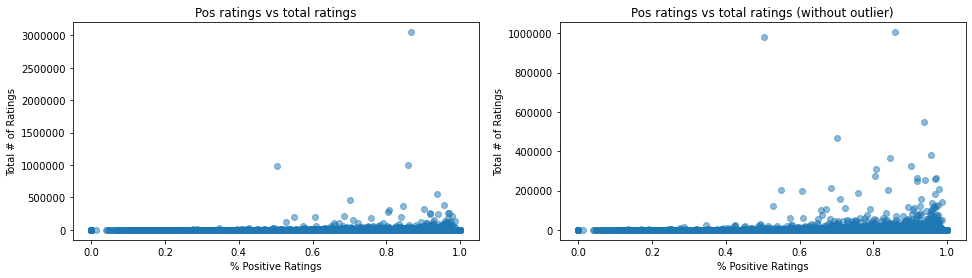

In [24]:
# View correlation of positive ratings with total ratings

fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=False)

ax[0].scatter(steam_data['perc_pos_ratings'], steam_data['total_ratings'], alpha=0.5);
ax[0].set_title('Pos ratings vs total ratings');
ax[0].set_xlabel('% Positive Ratings');
ax[0].set_ylabel('Total # of Ratings');
ax[0].ticklabel_format(useOffset=False, style='plain');

ax[1].scatter(steam_data.drop(25, axis=0)['perc_pos_ratings'], steam_data.drop(25, axis=0)['total_ratings'], alpha=0.5);
ax[1].set_title('Pos ratings vs total ratings (without outlier)');
ax[1].set_xlabel('% Positive Ratings');
ax[1].set_ylabel('Total # of Ratings');
ax[1].ticklabel_format(useOffset=False, style='plain');

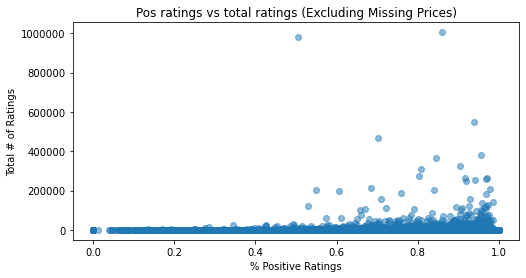

In [26]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(steam_data2['perc_pos_ratings'], steam_data2['total_ratings'], alpha=0.5);
ax.set_title('Pos ratings vs total ratings (Excluding Missing Prices)');
ax.set_xlabel('% Positive Ratings');
ax.set_ylabel('Total # of Ratings');
ax.ticklabel_format(useOffset=False, style='plain');

There seems to be some correlation between the total number of reviews a game has, and the percentage of those reviews that are positive.

### c. Relationship between revenue and positive reiviews

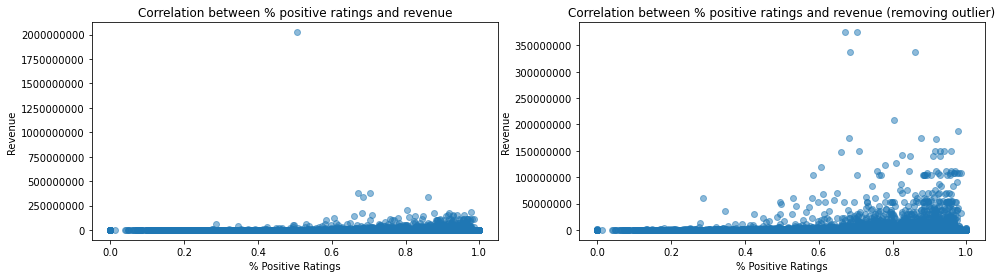

In [83]:
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=False)

# View correlation of revenue with % positive ratings
ax[0].scatter(steam_data['perc_pos_ratings'], steam_data['revenue'], alpha=0.5);
ax[0].set_title('Correlation between % positive ratings and revenue');
ax[0].set_xlabel('% Positive Ratings');
ax[0].set_ylabel('Revenue');
ax[0].ticklabel_format(useOffset=False, style='plain');

# Same thing, but removing outlier
ax[1].scatter(no_outlier['perc_pos_ratings'], no_outlier['revenue'], alpha=0.5);
ax[1].set_title('Correlation between % positive ratings and revenue (removing outlier)');
ax[1].set_xlabel('% Positive Ratings');
ax[1].set_ylabel('Revenue');
ax[1].ticklabel_format(useOffset=False, style='plain');

There is a trend between the two target features as well.

# 2. Explore Categorical Features

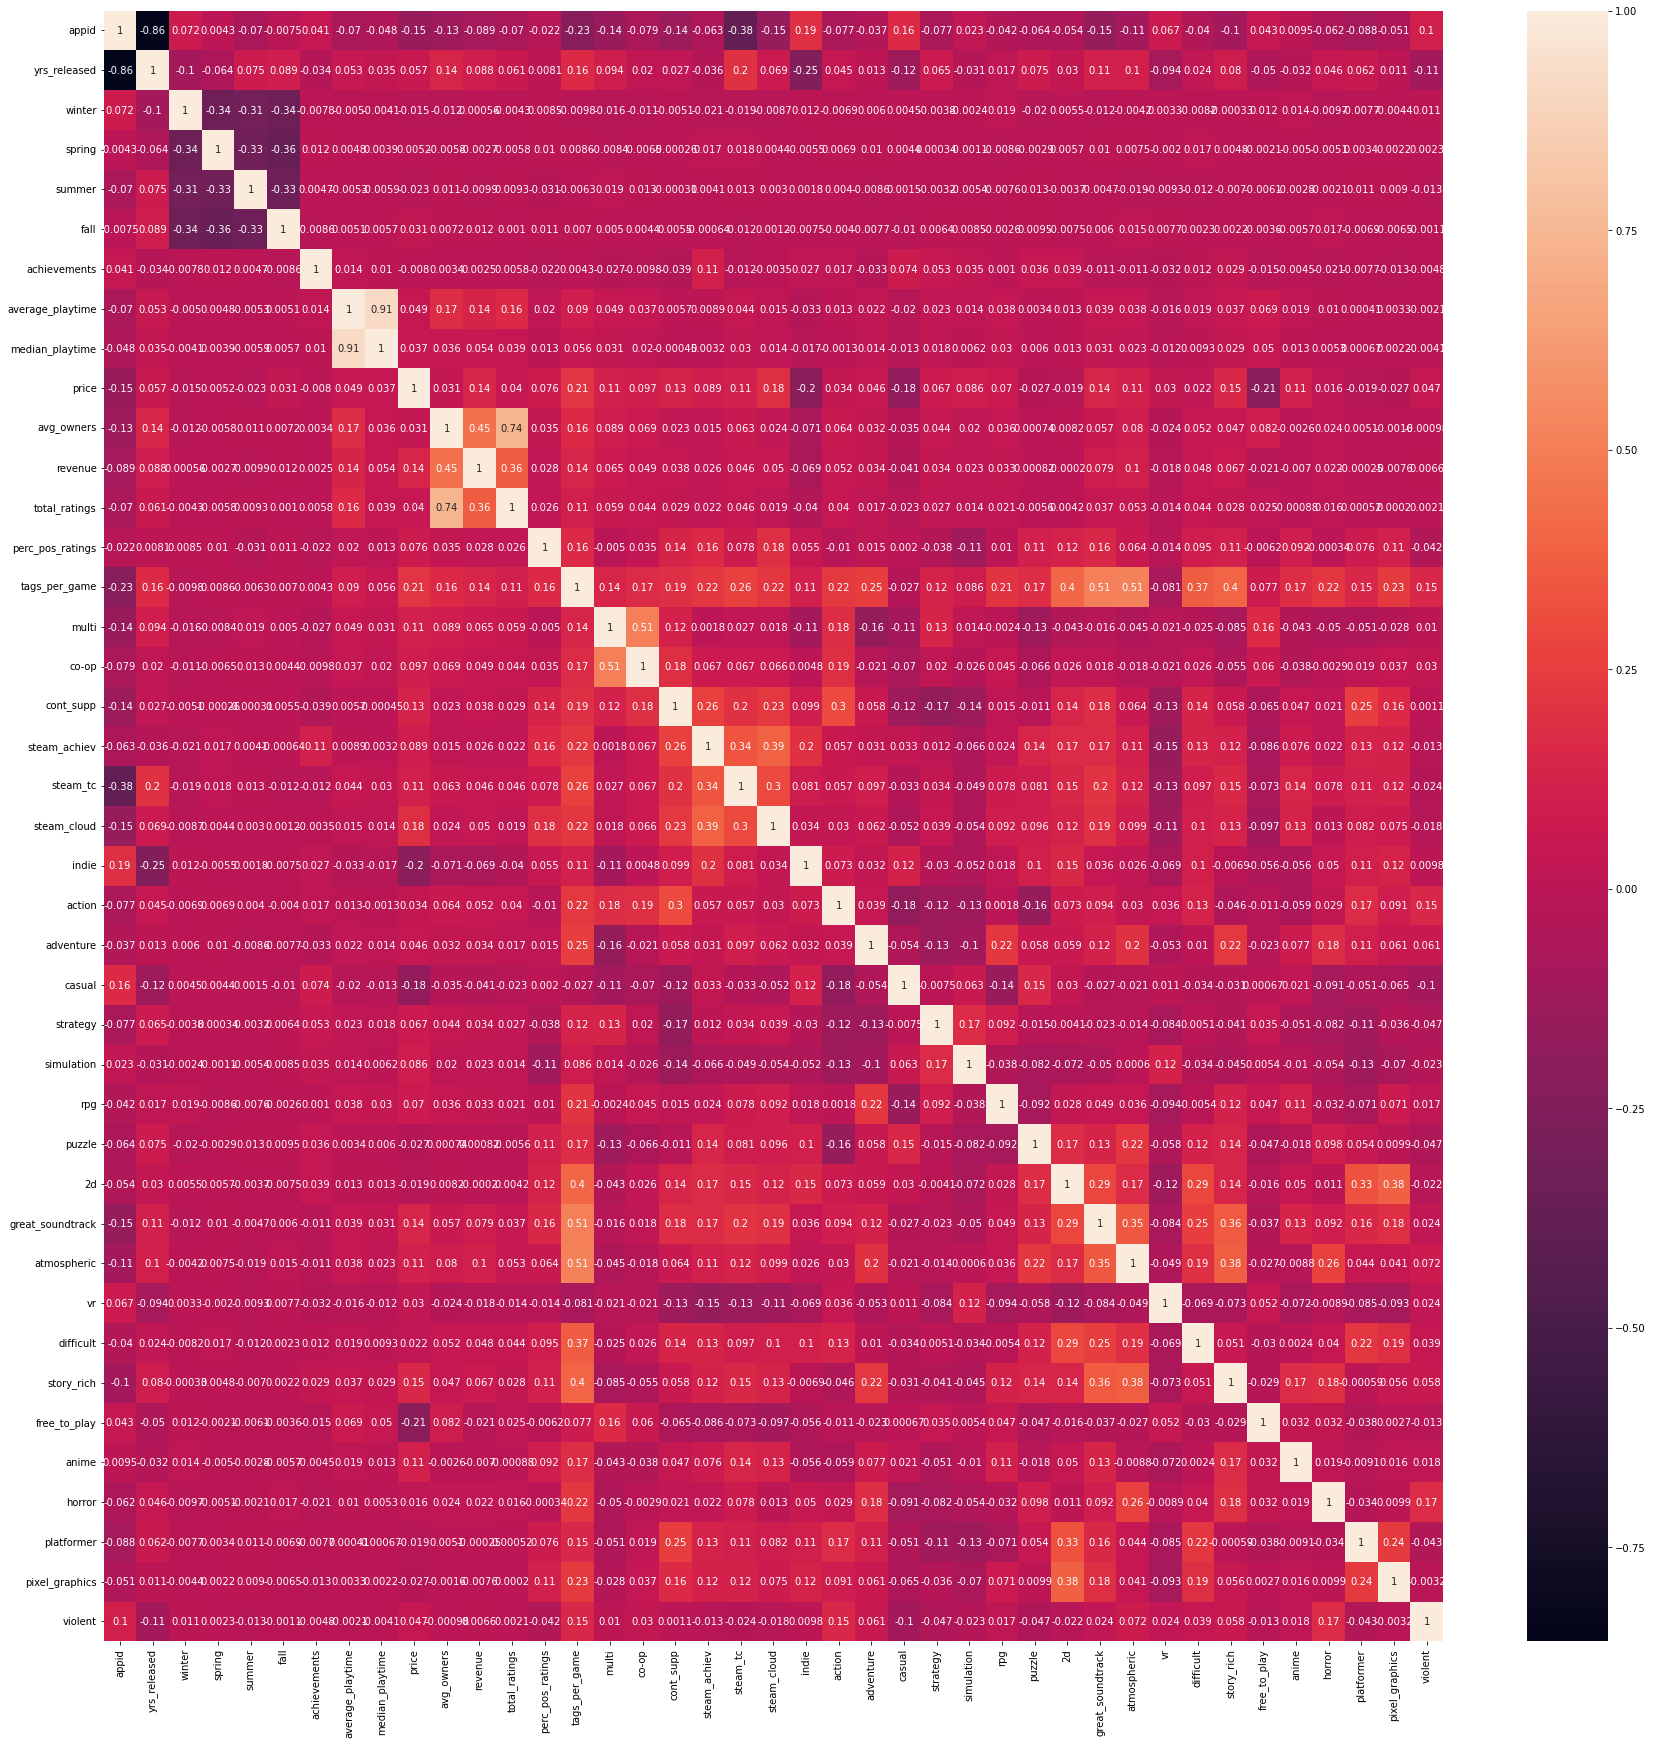

In [24]:
# Make a heatmap
plt.figure(figsize=(30,30))
_ = sns.heatmap(steam_data.corr(), annot=True)

In [45]:
def group_bar(columns, target, figsize=(20,10)):
    """Functions that takes in binary columns and produces a bar graph
    comparing each value (1 or 0) with a target feature"""
    labels = columns
    means_1 = []
    means_0 = []
    
    for col in columns:
        means = steam_data.groupby(col)[target].mean()
        means_1.append(means[1])
        means_0.append(means[0])
    
    x = np.arange(len(labels))
    width = 0.35
    
    # Plot the graph
    fig, ax = plt.subplots(figsize=figsize) 
    cols_1 = ax.bar(x - width/2, means_1, width, label="1")
    cols_0 = ax.bar(x + width/2, means_0, width, label="0")
    
    ax.set_title("Average {target} by top 20 genres".format(target=target))
    ax.set_xlabel("Genres")
    ax.set_ylabel("{target}".format(target=target))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=45)

    #ax.ticklabel_format(useOffset=False, style='plain')
    #ax.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    ax.legend()
    
    # Probably remove:
    #ax.bar_label(cols_1, padding=3)
    #ax.bar_label(cols_0, padding=3)

    #fig.tight_layout()
    plt.show()

### a. Genres

In [26]:
genres = ['indie', 'action', 'adventure', 'casual', 'strategy', 'simulation', 'rpg', 'puzzle', '2d', 'great_soundtrack',
          'atmospheric', 'difficult', 'story_rich', 'anime', 'horror', 'platformer', 'pixel_graphics', 'violent']

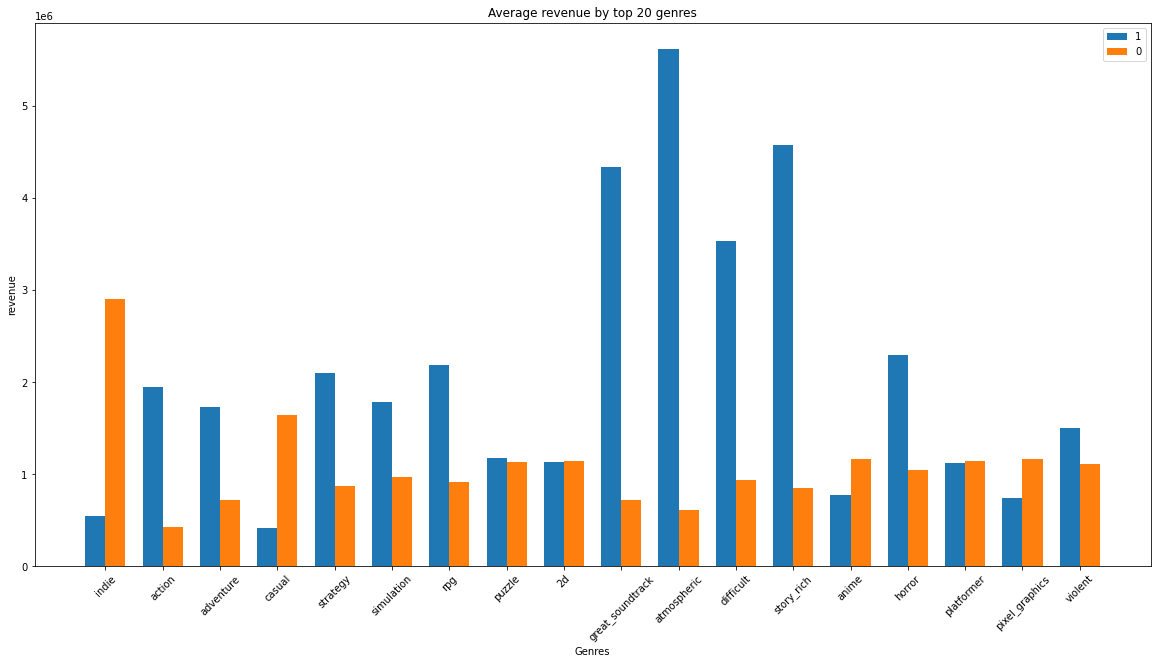

In [46]:
group_bar(genres, 'revenue')

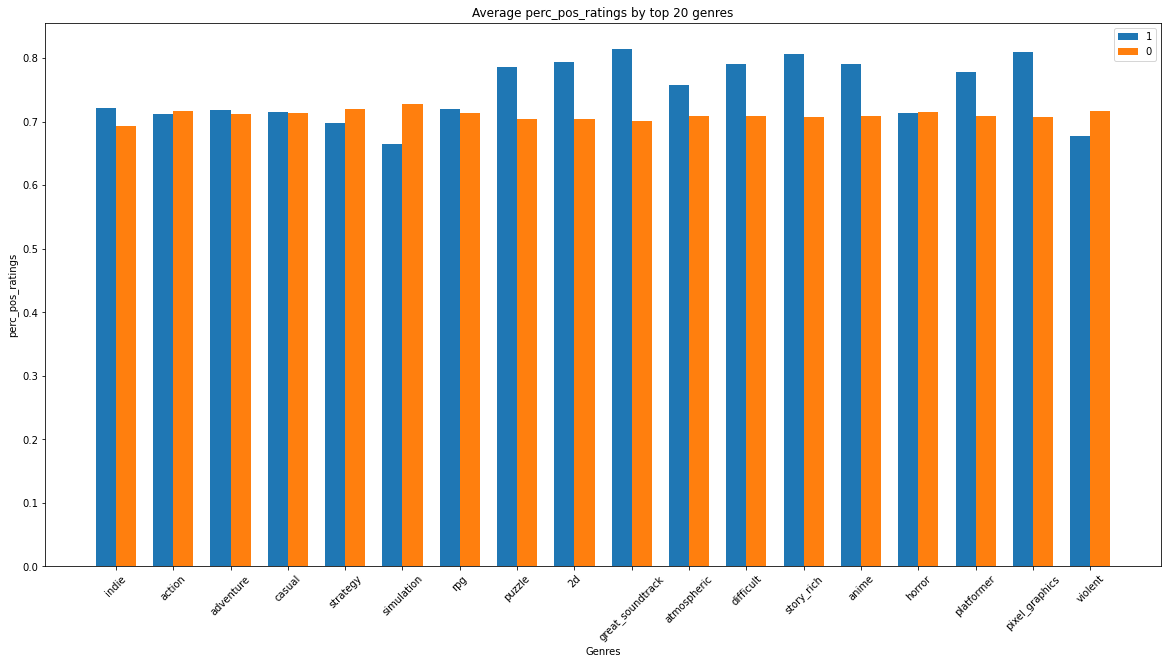

In [47]:
group_bar(genres, 'perc_pos_ratings')

### b. Season

In [75]:
seasons = ['winter', 'spring', 'summer', 'fall']

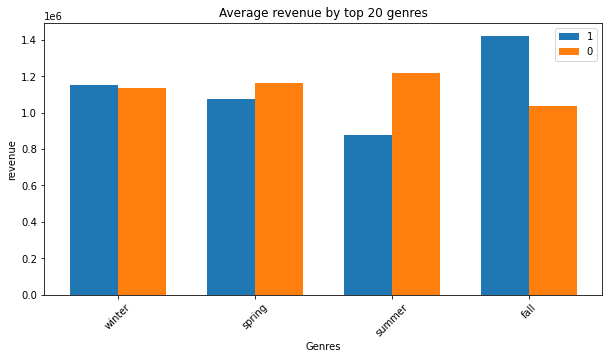

In [76]:
group_bar(seasons, 'revenue', figsize=(10,5))

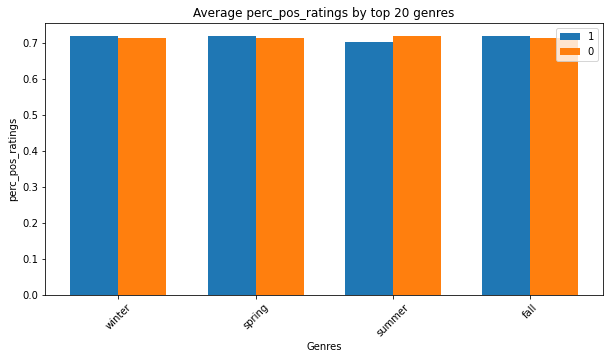

In [77]:
group_bar(seasons, 'perc_pos_ratings', figsize=(10,5))

### c. Game Categories

In [78]:
steam_data.columns

Index(['appid', 'name', 'release_date', 'yrs_released', 'winter', 'spring',
       'summer', 'fall', 'achievements', 'average_playtime', 'median_playtime',
       'price', 'avg_owners', 'revenue', 'total_ratings', 'perc_pos_ratings',
       'tags_per_game', 'multi', 'co-op', 'cont_supp', 'steam_achiev',
       'steam_tc', 'steam_cloud', 'indie', 'action', 'adventure', 'casual',
       'strategy', 'simulation', 'rpg', 'puzzle', '2d', 'great_soundtrack',
       'atmospheric', 'vr', 'difficult', 'story_rich', 'free_to_play', 'anime',
       'horror', 'platformer', 'pixel_graphics', 'violent'],
      dtype='object')

In [79]:
# Adding in VR and F2P
categories = ['multi', 'co-op', 'cont_supp', 'steam_achiev', 'steam_tc', 'steam_cloud', 'vr', 'free_to_play']

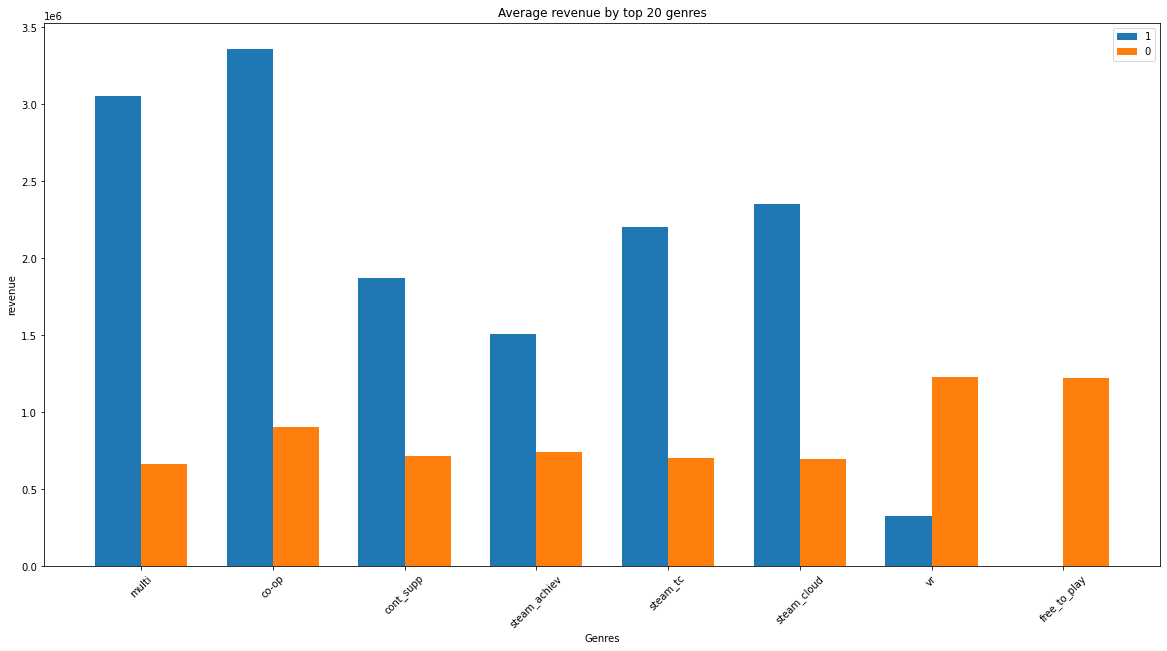

In [80]:
group_bar(categories, 'revenue')

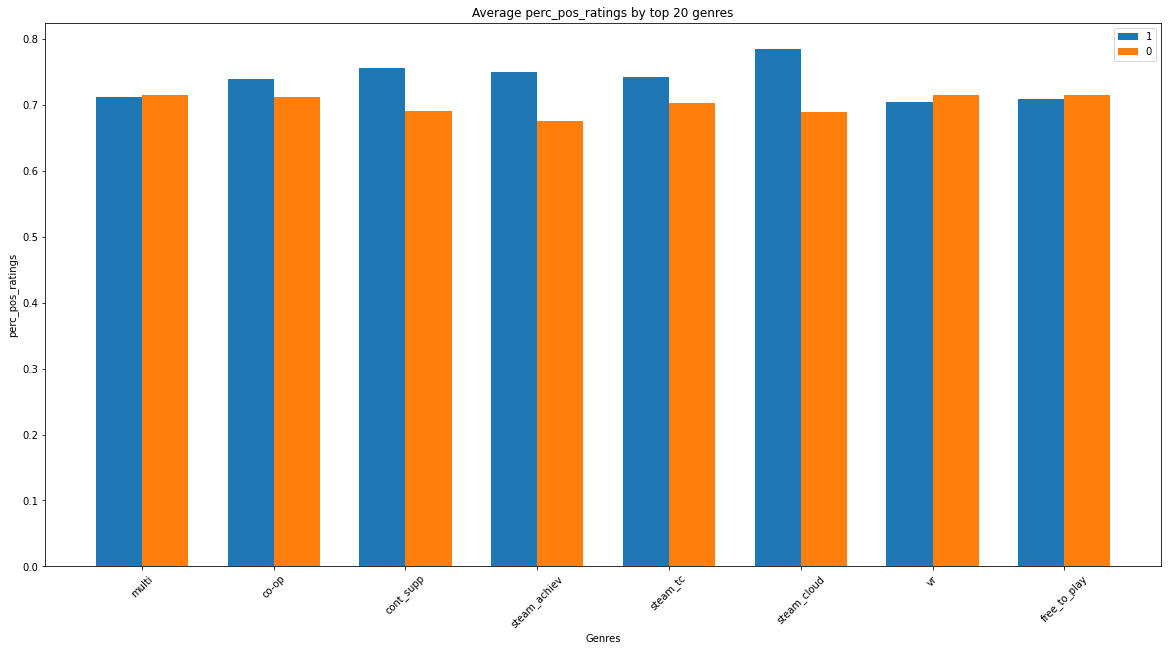

In [81]:
group_bar(categories, 'perc_pos_ratings')

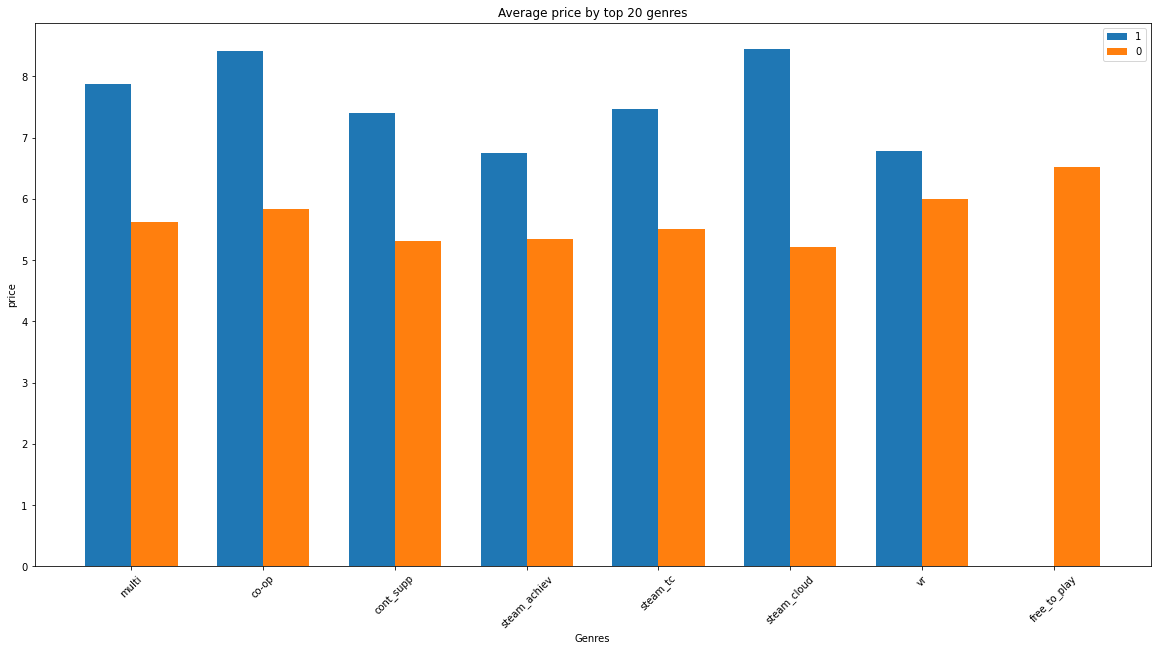

In [82]:
group_bar(categories, 'price')

# 3. Explore Numerical Features

In [49]:
steam_data.columns

Index(['appid', 'name', 'release_date', 'yrs_released', 'winter', 'spring',
       'summer', 'fall', 'achievements', 'average_playtime', 'median_playtime',
       'price', 'avg_owners', 'revenue', 'total_ratings', 'perc_pos_ratings',
       'tags_per_game', 'multi', 'co-op', 'cont_supp', 'steam_achiev',
       'steam_tc', 'steam_cloud', 'indie', 'action', 'adventure', 'casual',
       'strategy', 'simulation', 'rpg', 'puzzle', '2d', 'great_soundtrack',
       'atmospheric', 'vr', 'difficult', 'story_rich', 'free_to_play', 'anime',
       'horror', 'platformer', 'pixel_graphics', 'violent'],
      dtype='object')

In [30]:
numerical = ['yrs_released', 'achievements', 'average_playtime', 'median_playtime', 'price', 'avg_owners',
             'total_ratings', 'perc_pos_ratings', 'tags_per_game']

In [28]:
def plot_nums(columns, target, data, nrows, ncols, figsize=(10,10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=col, y=target, data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel=target)

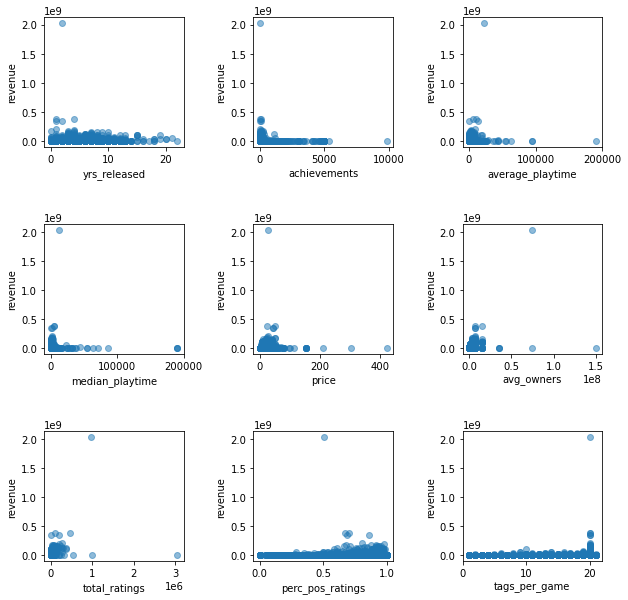

In [93]:
# Plot each numerical feature against revenue
plot_nums(numerical, 'revenue', steam_data, 3,3)

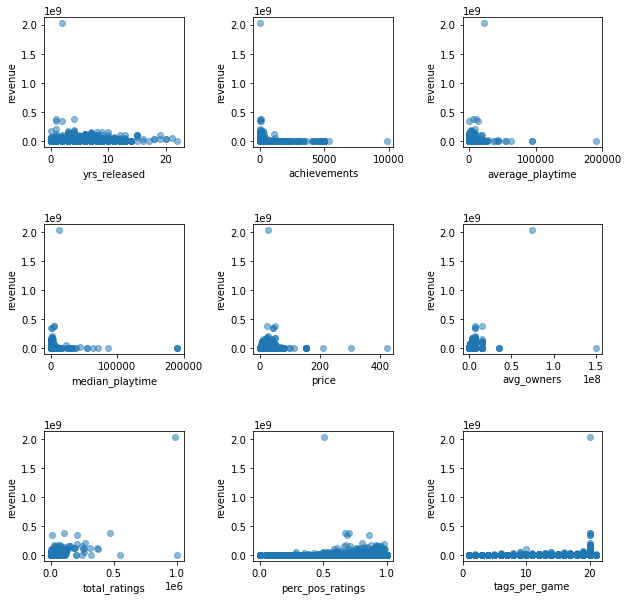

In [31]:
plot_nums(numerical, 'revenue', steam_data2, 3,3)

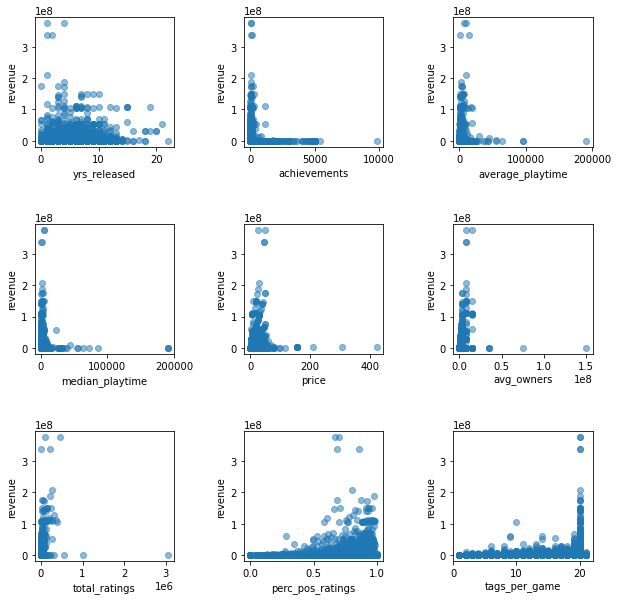

In [94]:
# Plot each numerical feature against revenue (without outlier)
plot_nums(numerical, 'revenue', no_outlier, 3,3)

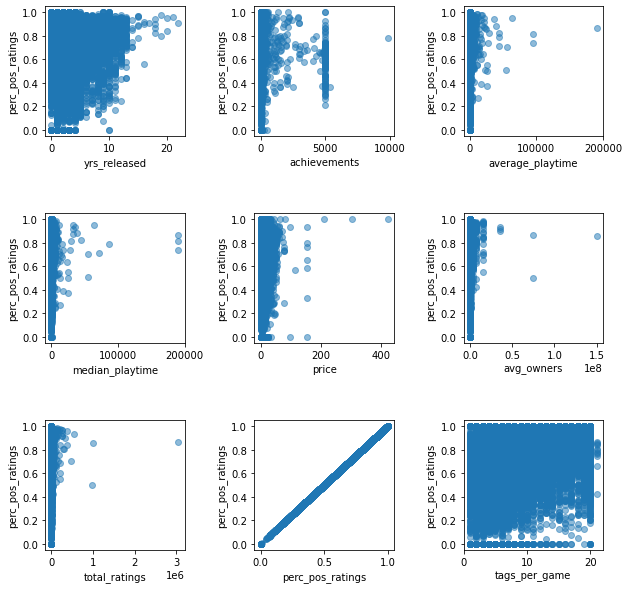

In [97]:
plot_nums(numerical, 'perc_pos_ratings', steam_data, 3,3)

Overall, percentage of positive ratings doesn't seem like a useful metric.